In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.stats import sigma_clip
from scipy.interpolate import interp1d
def my_plot_style():
    params = {'legend.fontsize': 15,
    'axes.labelsize': 15,
    'axes.titlesize':15,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'xtick.major.size':5,
    'xtick.minor.size':2.5,
    'ytick.major.size':5,
    'ytick.minor.size':2.5,
    'figure.facecolor':'w',
    #'lines.linewidth' : 1.5,
    'xtick.major.width':1.5,
    'ytick.major.width':1.5,
    'xtick.minor.width':1.5,
    'ytick.minor.width':1.5,
    'axes.linewidth':1.5,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'ytick.labelleft':True,
    'text.usetex' : False,
    'font.family': 'sans-serif'}
    plt.rcParams.update(params)
my_plot_style()

In [2]:
def sum_mag(arr):
    return -2.5*np.log10(np.sum(10**(-0.4*arr)))

### 1. Download cluster data and select samples
For each clusters, I select a certain region in pmra-parallax and pmdec-parallax plot. Than, I do sigma-clipping on the distance provided in the database. With sigma-clipping, I can minimize the difference in distance within cluster members.\
In the member-selection plot, blue dots are original datas while orange dots and the selected members.

In [3]:
open1 = Table.read('./ngc2632-result.fits')
open2 = Table.read('./ic2391-result.fits')
globular = Table.read('./ngc6205-result.fits')
names = ['NGC2632','IC2391','NGC6205']

open1 = open1[(~np.isnan(open1['pmra']))&(~np.isnan(open1['pmdec']))&\
              (~np.isnan(open1['distance_gspphot']))&(open1['parallax']>0)]
open2 = open2[(~np.isnan(open2['pmra']))&(~np.isnan(open2['pmdec']))&\
              (~np.isnan(open2['distance_gspphot']))&(open2['parallax']>0)]
globular = globular[(~np.isnan(globular['pmra']))&(~np.isnan(globular['pmdec']))&\
              (~np.isnan(globular['distance_gspphot']))&(globular['parallax']>0)]

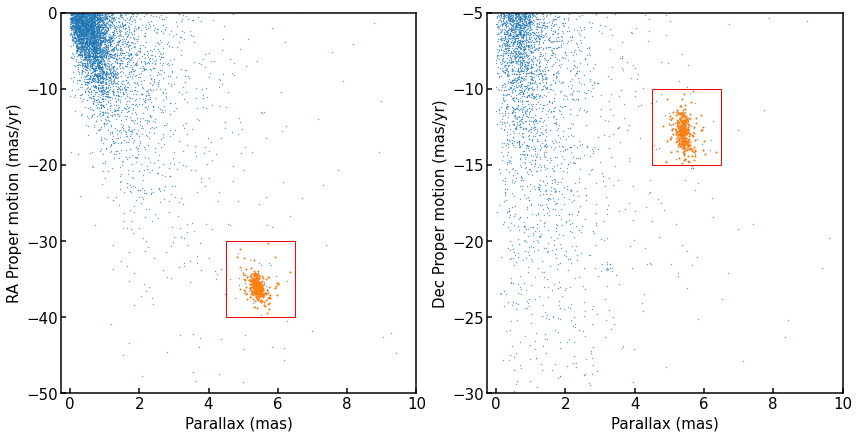

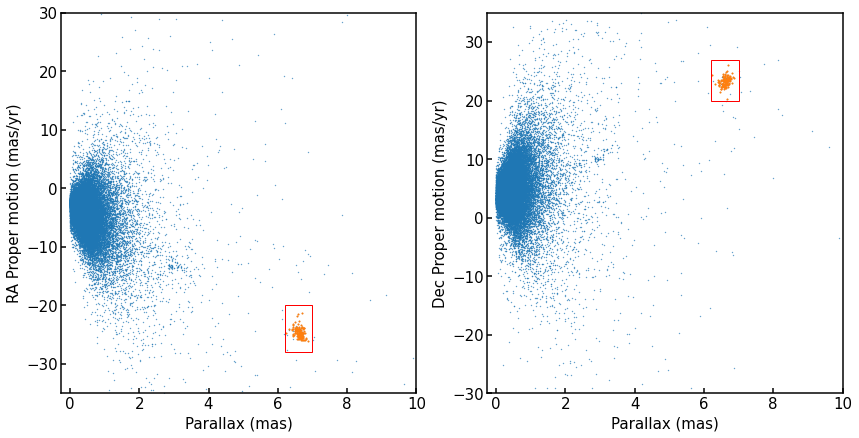

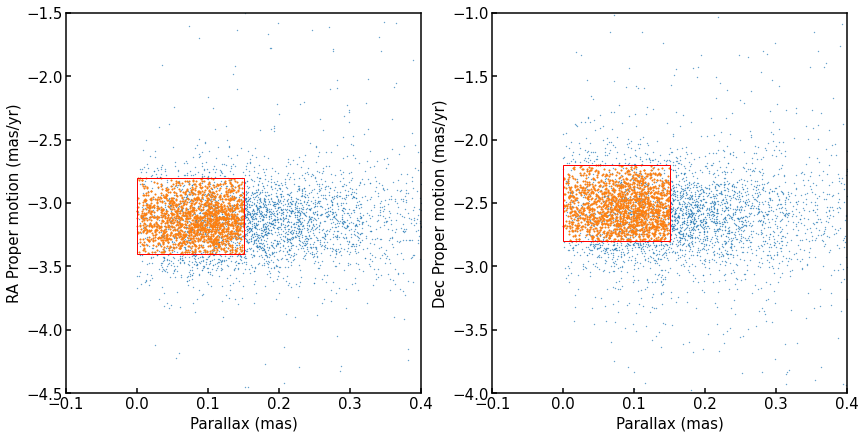

In [4]:
yaxis    = ['pmra','pmdec']
yname    = ['RA Proper motion (mas/yr)','Dec Proper motion (mas/yr)']

def select_member(cluster,rec_x_arr,rec_y_arr,plot_x_arr,plot_y_arr,yaxis,yname):
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,7))
    bool_arr = []
    for i in range(2):
        ax = axes[i]
        
        # Set plotting data and rectangle boundary
        x, y = 'parallax', yaxis[i]
        xlim, ylim = rec_x_arr[i], rec_y_arr[i]
        cx, dx = np.mean(xlim), xlim[1]-xlim[0]
        cy, dy = np.mean(ylim), ylim[1]-ylim[0]
        rec = plt.Rectangle([xlim[0],ylim[0]],xlim[1]-xlim[0],ylim[1]-ylim[0],fill=False,color='red')

        ax.scatter(cluster[x],cluster[y],s=0.1)
        ax.add_patch(rec)
        ax.set_xlabel('Parallax (mas)')
        ax.set_ylabel(yname[i])
        ax.set_xlim(plot_x_arr[i])
        ax.set_ylim(plot_y_arr[i])
        
        # First select sample by eye
        boolean = (abs(cluster[x]-cx)<dx/2)&(abs(cluster[y]-cy)<dy/2)
        bool_arr.append(boolean)

    # sigma-clipping data in sample
    boolean = bool_arr[0]&bool_arr[1]
    sample = cluster[boolean]
    mask = sigma_clip(sample['distance_gspphot'],sigma=3).mask
    sample = sample[~mask]
    for i in range(2):
        axes[i].scatter(sample['parallax'],sample[yaxis[i]],s=1)
    plt.show()
    return sample

# NGC2632
rec_x_arr = [[4.5,6.5],[4.5,6.5]]
rec_y_arr = [[-40,-30],[-15,-10]]
plot_y_arr = [[-50,0],[-30,-5]]
plot_x_arr = [[-0.25,10],[-0.25,10]]
pick_open1 = select_member(open1,rec_x_arr,rec_y_arr,plot_x_arr,plot_y_arr,yaxis,yname)

# IC2391
rec_x_arr = [[6.2,7],[6.2,7]]
rec_y_arr = [[-28,-20],[20,27]]
plot_x_arr = [[-0.25,10],[-0.25,10]]
plot_y_arr = [[-35,30],[-30,35]]
pick_open2 = select_member(open2,rec_x_arr,rec_y_arr,plot_x_arr,plot_y_arr,yaxis,yname)

# NGC 6205
rec_x_arr = [[0,0.15],[0,0.15]]
rec_y_arr = [[-3.4,-2.8],[-2.8,-2.2]]
plot_x_arr = [[-0.1,0.4],[-0.1,0.4]]
plot_y_arr = [[-4.5,-1.5],[-4,-1]]
pick_globular = select_member(globular,rec_x_arr,rec_y_arr,plot_x_arr,plot_y_arr,yaxis,yname)

### 2. HR diagram of each clusters

In two of the open clusters, blue main-sequence dominates light and color; while in globular bluster, it is the giant branch stars that dominates the light and color.

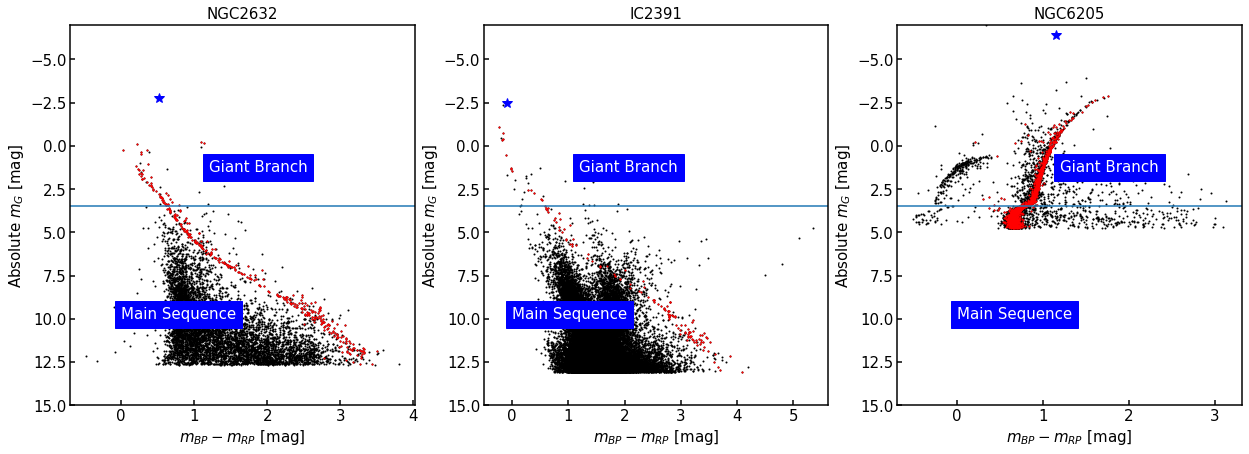

In [5]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(21,7))

clusters = [open1,open2,globular]
samples  = [pick_open1,pick_open2,pick_globular]
distance = [6.35, 5.908, 14.256]
color = ['tab:blue','tab:orange','tab:green']
ages  = [10**8.85/1e9,10**7.70/1e9,13]

bp, rp, g = 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'phot_g_mean_mag'

for i in range(3):
    cluster = clusters[i]
    sample  = samples[i]
    ax      = axes[i]

    ax.scatter(cluster[bp]-cluster[rp],cluster[g]-distance[i],s=1,alpha=1,c='black')
    ax.scatter(sample[bp]-sample[rp],sample[g]-distance[i],s=1,alpha=1,c='red')

    ax.plot(sum_mag(sample[bp])-sum_mag(sample[rp]),sum_mag(sample[g]-distance[i])\
            ,marker='*',c='blue',markersize=10)    
    
    ax.set_ylim([15,-7])
    ax.set_xlabel(r'$m_{BP} - m_{RP}\ [{\rm mag}]$')
    ax.set_ylabel(r'Absolute $m_{G}\ [{\rm mag}]$')
    ax.set_title(names[i])
    ax.axhline(3.5)

    ax.text(0,10,'Main Sequence',backgroundcolor='blue',c='white',fontsize=15)
    ax.text(1.2,1.5,'Giant Branch',backgroundcolor='blue',c='white',fontsize=15)

plt.show()

### 3. Convert to bolometric magnitude
For NGC2632 and IC2391, I consider all of the cluster members as main sequence stars. As for NGC6205, most of them are on the giant branch, so I take absolute g-band magnitude=3.5 as a cut of main sequence stars.

In [6]:
data = Table.read('BC_Table.csv')
BC = interp1d(data['B-V'],data['BC'],fill_value='extrapolate')
def mag2bolo(data,distance):
    Mv = data[g]-distance
    corr = BC(data[bp]-data[g])
    return Mv-corr

# Elements store in these Tables are main sequence stars.
open1, open2, globular = Table(), Table(), Table()
open1['bolometric'] = mag2bolo(pick_open1,distance[0])
open2['bolometric'] = mag2bolo(pick_open2,distance[1])

boolean = pick_globular[g]-distance[2]>3.5
globular['bolometric'] = mag2bolo(pick_globular[boolean],distance[2])

clusters = [open1,open2,globular]

### 4. Convert to mass

In [7]:
data = Table.read('MS_star_scaling_relations.fits')
def scaling(inp,quanf='luminosity',quan2='mass'):
    # quan = Teff, luminosity, tau_MS_Gyr
    #return np.interp(mass,scaling['mass'],scaling[quan])
    func = interp1d(data[quanf],data[quan2], fill_value='extrapolate')
    return func(inp)
def plot_pdf(sample,bins=30,binsize=-1):
    sample = np.array(sample)
    hist, bedge = np.histogram(sample,bins=bins)
    bedges = (bedge[1:]+bedge[:-1])/2.0
    if(binsize<0): binsize = bedge[1]-bedge[0]
    return bedges, hist/np.sum(hist)/binsize

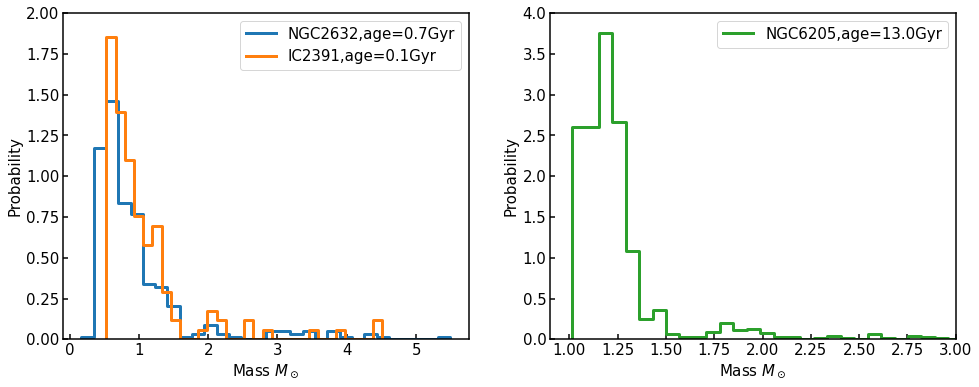

In [8]:
for cluster in clusters:
    cluster['luminosity'] = 10**(0.4*(4.75-cluster['bolometric']))
    cluster['mass'] = scaling(cluster['luminosity'].data)
    cluster['lifetime'] = scaling(cluster['luminosity'].data,quan2='tau_MS_Gyr')

def bar(x,y):
    width = x[1]-x[0]
    out_x, out_y = [x[0]-width/2], [0]
    for i in range(len(x)):
        out_x.append(x[i]-width/2)
        out_x.append(x[i]+width/2)
        out_y.append(y[i])
        out_y.append(y[i])
    out_x.append(x[i]+width/2)
    out_y.append(0)
    return out_x, out_y

fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(16,6))
for i,cluster in enumerate(clusters[:2]):
    x, y = plot_pdf(cluster['mass'])
    bx, by = bar(x,y)
    axes[0].plot(bx,by,color=color[i],linewidth=3,label=f'{names[i]},age={ages[i]:.1f}Gyr')
axes[0].set_ylim([0,2])


x, y = plot_pdf(clusters[2]['mass'],bins=30)
bx, by = bar(x,y)
axes[1].plot(bx,by,color=color[2],linewidth=3,label=f'{names[2]},age={ages[2]:.1f}Gyr')
axes[1].set_ylim([0,4])
axes[1].set_xlim([0.9,3])
for ax in axes:
    ax.legend()
    ax.set_xlabel('Mass $M_\odot$')
    ax.set_ylabel('Probability')

plt.show()

All of the mass functions have more low-mass stars comparing with high-mass stars. For the open clusters, IC2391 has more stars at the low mass and than NGC2632. On the other hand, the mass distribution of NGC6205 is more compact than the other since their mass mainly distributing between 1-1.5 $M_\odot$. This may imply that stars in globular cluster has similiar masses.

In [9]:
pick = [pick_open1,pick_open2,pick_globular]
for i in range(3):
    m2l = np.sum(clusters[i]['mass'])/np.sum(10**(-0.4*(mag2bolo(pick[i],distance[i])-4.74)))
    print(f'Mass-Light ratio of {names[i]} is {m2l:.3f}')

Mass-Light ratio of NGC2632 is 0.061
Mass-Light ratio of IC2391 is 0.074
Mass-Light ratio of NGC6205 is 0.031
